<a href="https://colab.research.google.com/github/mannmoshe/deep-learning/blob/main/Solutions/01_Grad_descent_linear_reg_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML Review and Gradient Descent Example

***All the cells that start with "MM" written or edited by Moshe Mann.***

In this notebook, we will solve a simple linear regression problem by gradient descent.  
We will see the effect of the learning rate on the trajectory in parameter space.
We will show how Stochastic Gradient Descent (SGD) differs from the standard version, and the effect of "shuffling" your data during SGD.

In [65]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.version


'3.7.12 (default, Jan 15 2022, 18:48:18) \n[GCC 7.5.0]'

In [66]:
# Preliminaries - packages to load

from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Generate Data from a known distribution
Below we will generate data a known distribution.  
Specifically, the true model is:

$Y = b + \theta_1 X_1 + \theta_2 X_2 + \epsilon$

$X_1$ and $X_2$ have a uniform distribution on the interval $[0,10]$, while `const` is a vector of ones (representing the intercept term).

We set actual values for $b$ ,$\theta_1$, and $\theta_2$

Here $b=1.5$, $\theta_1=2$, and $\theta_2=5$

We then generate a vector of $y$-values according to the model and put the predictors together in a "feature matrix" `x_mat`

In [67]:
np.random.seed(1234)  ## This ensures we get the same data if all of the other parameters remain fixed

num_obs = 100
x1 = np.random.uniform(0,10,num_obs)
x2 = np.random.uniform(0,10,num_obs)
const = np.ones(num_obs)
eps = np.random.normal(0,.5,num_obs)

b = 1.5
theta_1 = 2
theta_2 = 5

y = b*const+ theta_1*x1 + theta_2*x2 + eps

x_mat = np.array([const,x1,x2]).T
print(x1)
print(x2)
print(const)
print(y)
print(x_mat)

[1.9151945  6.22108771 4.37727739 7.85358584 7.79975808 2.72592605
 2.76464255 8.01872178 9.58139354 8.75932635 3.5781727  5.00995126
 6.83462935 7.12702027 3.70250755 5.61196186 5.03083165 0.1376845
 7.72826622 8.82641191 3.64885984 6.15396178 0.75381242 3.68824006
 9.33140102 6.51378143 3.97202578 7.88730143 3.16836122 5.68098653
 8.6912739  4.36173424 8.02147642 1.43766825 7.04260971 7.04581308
 2.18792106 9.24867629 4.42140755 9.09315959 0.59809223 1.84287084
 0.47355279 6.74880944 5.9462478  5.33310163 0.43324063 5.6143308
 3.29668446 5.02966833 1.11894318 6.07193706 5.65944643 0.06764062
 6.17441709 9.12122886 7.90524133 9.92081466 9.58801762 7.91964135
 2.8525096  6.24916705 4.78093796 1.95675179 3.82317452 0.53873685
 4.51648408 9.82004742 1.239427   1.19380898 7.38523056 5.87303633
 4.71632534 1.07126817 2.29218565 8.99965195 4.16753538 5.35851663
 0.06208517 3.00641706 4.36893172 6.12148997 9.18198075 6.2573667
 7.05997565 1.49833716 7.46063409 8.31006992 6.33725769 4.3830988

## Get the "Right" answer directly
In the below cells we solve for the optimal set of coefficients.  Note that even though the true model is given by:

$b=1.5$, $\theta_1=2$, and $\theta_2=5$

The maximum likelihood (least-squares) estimate from a finite data set may be slightly different.

## Exercise:
Solve the problem two ways: 
1. By using the scikit-learn LinearRegression model
2. Using matrix algebra directly via the formula $\theta = (X^T X)^{-1}X^Ty$

Note: The scikit-learn solver may give a warning message, this can be ignored.

In [68]:
### Solve directly using sklearn
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression(fit_intercept=False)
lr_model.fit(x_mat, y)

lr_model.coef_

array([1.49004618, 1.99675416, 5.01156315])

In [69]:
## Solve by matrix calculation
np.linalg.inv(np.dot(x_mat.T,x_mat)).dot(x_mat.T).dot(y)

array([1.49004618, 1.99675416, 5.01156315])

## Solving by Gradient Descent
Another way to solve this problem is to use the method of Gradient Descent.  We will explore this method because (as we will see) Neural Networks are trained by Gradient Descent.  Seeing how gradient descent works on a simple example will build intuition and help us understand some of the nuances around setting the learning rate.  We will also explore Stochastic Gradient Descent and compare its behavior to the standard approach.

## Exercise

The next several cells have code to perform (full-batch) gradient descent.  We have omitted some parameters for you to fill in.

1. Pick a learning rate, and a number of iterations, run the code, and then plot the trajectory of your gradient descent.
1. Find examples where the learning rate is too high, too low, and "just right".
1. Look at plots of loss function under these conditions.



In [70]:
## Parameters to play with 
learning_rate = .01
num_iter = 1000
theta_initial = np.array([3,3,3])

In [71]:
## Initialization steps
theta = theta_initial
theta_path = np.zeros((num_iter+1,3))
theta_path[0,:]= theta_initial

loss_vec = np.zeros(num_iter)
## Main Gradient Descent loop (for a fixed number of iterations)
print(num_iter)
for i in range(1000):
    y_pred = np.dot(theta.T,x_mat.T)
    loss_vec[i] = np.sum((y-y_pred)**2)
    grad_vec = (y-y_pred).dot(x_mat)/num_obs  #sum up the gradients across all observations and divide by num_obs
    grad_vec = grad_vec
    theta = theta + learning_rate*grad_vec
    if (i>990):
      print(loss_vec[i])
      print(theta)
    theta_path[i+1,:]=theta
    
    

1000
26.950975528949872
[1.94031494 1.95756706 4.97601884]
26.944522080180928
[1.9397513  1.95761611 4.97606334]
26.93808477773573
[1.93918838 1.9576651  4.97610778]
26.931663581216572
[1.93862616 1.95771403 4.97615216]
26.92525845032702
[1.93806464 1.9577629  4.97619648]
26.918869344871474
[1.93750382 1.95781171 4.97624075]
26.912496224754673
[1.93694371 1.95786046 4.97628497]
26.906139049981807
[1.9363843  1.95790914 4.97632913]
26.899797780658183
[1.93582559 1.95795777 4.97637323]


(0.0, 500.0)

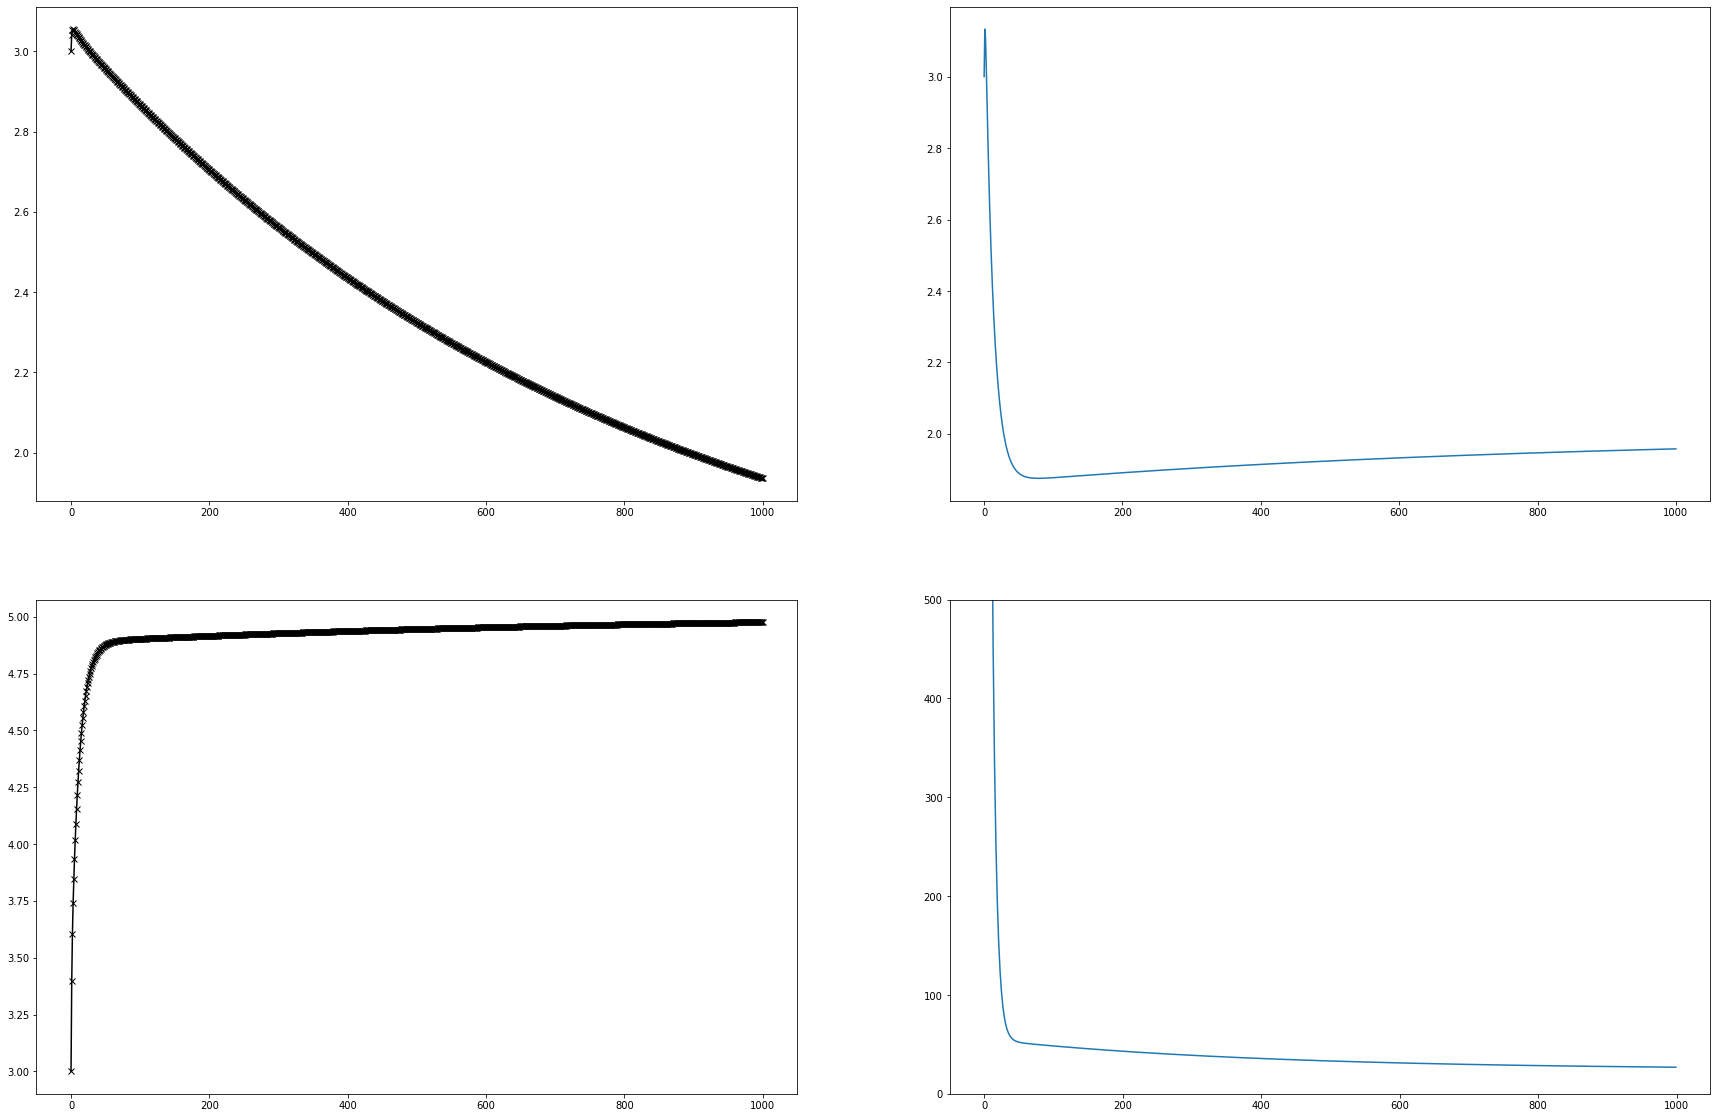

In [72]:
    
## Plot the results - it is a 3d parameter space - we plot 2d slices
## Green is starting point and blue is ending point
plt.figure(figsize = (30,20))
plt.subplot(2,2,1)
plt.plot(theta_path[:,0],'k-x')
plt.subplot(2,2,2)
plt.plot(theta_path[:,1])

plt.subplot(2,2,3)
plt.plot(theta_path[:,2],'k-x')

plt.subplot(2,2,4)
plt.plot(loss_vec)
plt.ylim([0,500])

## Plot the loss function

## Stochastic Gradient Descent
Rather than average the gradients across the whole dataset before taking a step, we will now take a step for every datapoint.  Each step will be somewhat of an "overreaction" but they should average out.

## Exercise
The below code runs Stochastic Gradient descent, but runs through the data in the same order every time.  

1. Run the code and plot the graphs.  What do you notice?
2. Modify the code so that it randomly re-orders the data.  How do the sample trajectories compare? [STUDENT TO COMPLETE THIS]

In [73]:
## Parameters to play with
learning_rate = .002
num_iter = 10 #The number of "steps" will be num_iter * numobs
theta_initial = np.array([3,3,3])

In [74]:
## Initialization steps
theta = theta_initial
theta_path = np.zeros(((num_iter*num_obs)+1,3))
theta_path[0,:]= theta_initial
loss_vec = np.zeros(num_iter*num_obs)

In [75]:
## Main SGD loop
count = 0
for i in range(num_iter):
    for j in range(num_obs):
        count+=1
        y_pred = np.dot(theta.T,x_mat.T)
        loss_vec[count-1] = np.sum((y-y_pred)**2)
        grad_vec = (y[j]-y_pred[j])*(x_mat[j,:])
        theta = theta + learning_rate*grad_vec
        theta_path[count,:]=theta

(0.0, 500.0)

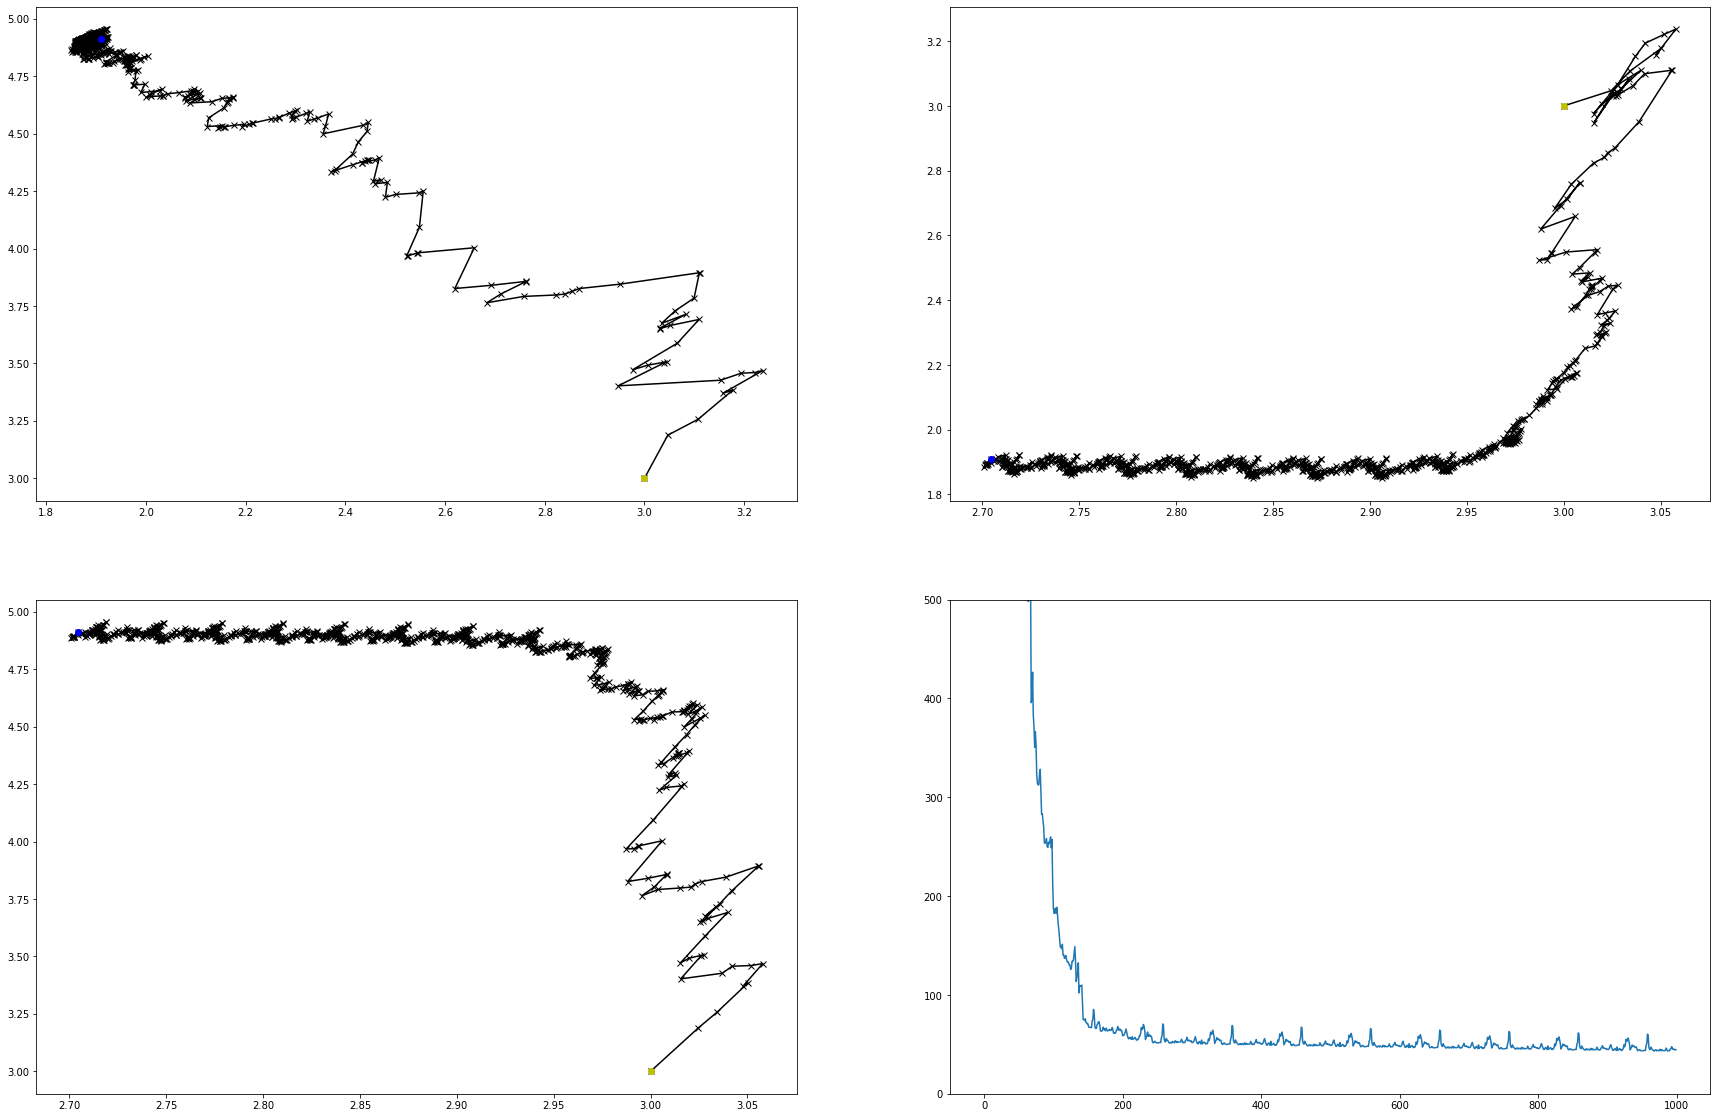

In [76]:
## Plot the results - it is a 3d parameter space - we plot 2d slices
## Green is starting point and blue is ending point
plt.figure(figsize = (30,20))
plt.subplot(2,2,1)
plt.plot(theta_path[:,1],theta_path[:,2],'k-x')
plt.plot(theta_path[0,1],theta_path[0,2],'yo')
plt.plot(theta_path[-1,1],theta_path[-1,2],'bo')
plt.subplot(2,2,2)
plt.plot(theta_path[:,0],theta_path[:,1],'k-x')
plt.plot(theta_path[0,0],theta_path[0,1],'yo')
plt.plot(theta_path[-1,0],theta_path[-1,1],'bo')

plt.subplot(2,2,3)
plt.plot(theta_path[:,0],theta_path[:,2],'k-x')
plt.plot(theta_path[0,0],theta_path[0,2],'yo')
plt.plot(theta_path[-1,0],theta_path[-1,2],'bo')

plt.subplot(2,2,4)
plt.plot(loss_vec)
plt.ylim([0,500])

In [77]:
## Student to write code below.

In [78]:
## Parameters to play with
learning_rate = .002
num_iter = 10 #The number of "steps" will be num_iter * numobs
theta_initial = np.array([3,3,3])

In [79]:
## Initialization steps
theta = theta_initial
theta_path = np.zeros(((num_iter*num_obs)+1,3))
theta_path[0,:]= theta_initial
loss_vec = np.zeros(num_iter*num_obs)

In [81]:
# MM
## Main SGD loop
count = 0
for i in range(num_iter):
    for j in range(num_obs):
        count+=1
        j = np.random.randint(0, num_obs)
        y_pred = np.dot(theta.T,x_mat.T)
        loss_vec[count-1] = np.sum((y-y_pred)**2)
        grad_vec = (y[j]-y_pred[j])*(x_mat[j,:])
        theta = theta + learning_rate*grad_vec
        theta_path[count,:]=theta

(0.0, 500.0)

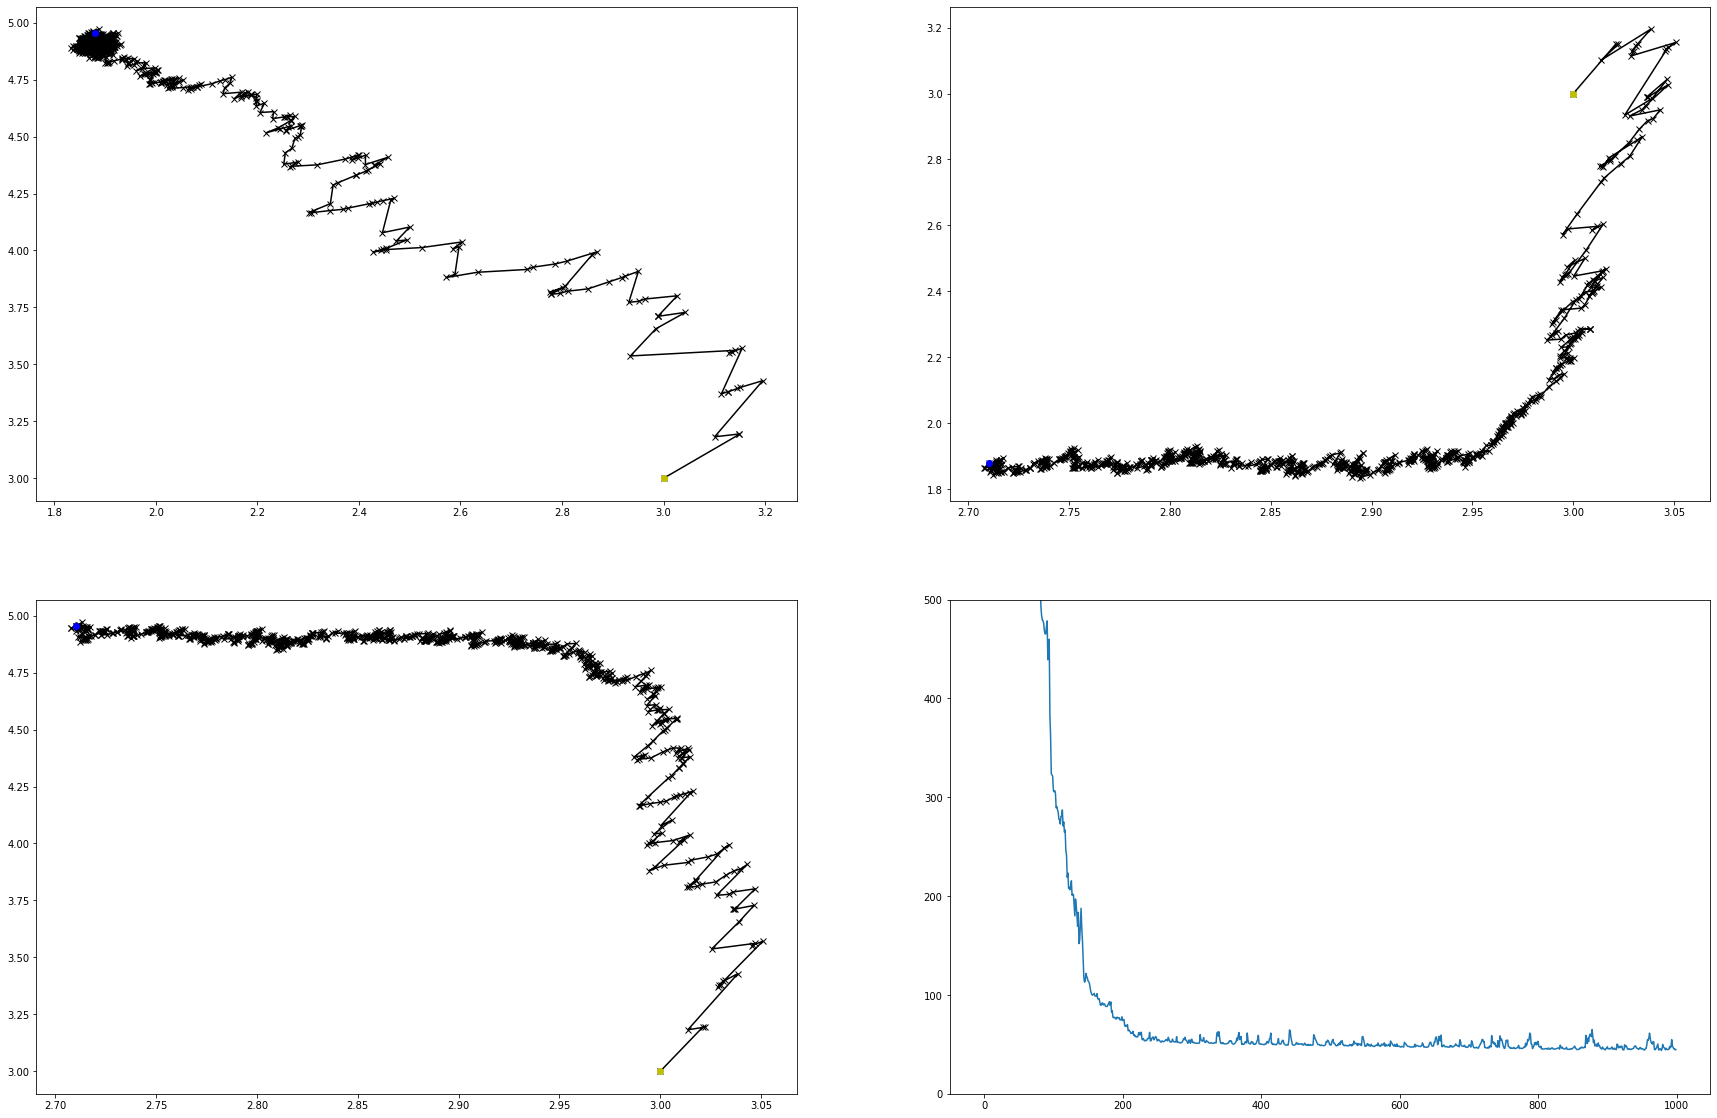

In [82]:
## Plot the results - it is a 3d parameter space - we plot 2d slices
## Green is starting point and blue is ending point
plt.figure(figsize = (30,20))
plt.subplot(2,2,1)
plt.plot(theta_path[:,1],theta_path[:,2],'k-x')
plt.plot(theta_path[0,1],theta_path[0,2],'yo')
plt.plot(theta_path[-1,1],theta_path[-1,2],'bo')
plt.subplot(2,2,2)
plt.plot(theta_path[:,0],theta_path[:,1],'k-x')
plt.plot(theta_path[0,0],theta_path[0,1],'yo')
plt.plot(theta_path[-1,0],theta_path[-1,1],'bo')

plt.subplot(2,2,3)
plt.plot(theta_path[:,0],theta_path[:,2],'k-x')
plt.plot(theta_path[0,0],theta_path[0,2],'yo')
plt.plot(theta_path[-1,0],theta_path[-1,2],'bo')

plt.subplot(2,2,4)
plt.plot(loss_vec)
plt.ylim([0,500])

#MM:
After randomization it looks like the trajectory is more straight forward.